# **HACKTIV8 - BATCH 3 - FINAL PROJECT 3**
1. Alifia Mustika Sari
2. Naila Qisthi Azzahra

# **INTRODUCTION**
---

### **LATAR BELAKANG MEMILIH KASUS**

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 13 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.

### **DATA YANG DIGUNAKAN**

Dataset yang digunakan adalah dataset yang berisi 299 baris dan 13 kolom. Kita akan menggunakan dataset "heart_failure_clinical_records_dataset.csv" yang tersedia untuk digunakan. Dataset ini berisi kumpulan fitur yang digunakan untuk memprediksi kematian akibat gagal jantung.

Sumber : https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data.

#### Variabel Dependen

DEATH_EVENT

#### Variabel Independen

age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, dan time.

#### Informasi Atribut

1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

### **OBJECTIVE YANG INGIN DICAPAI**

Dalam penelitian ini kami memprediksi dari kumpulan data rekaman penyakit CVD untuk memprediksi kematian akibat penyakit gagal jantung. 

# **IMPORT LIBRARIES**
---

In [1]:
import pandas as pd
import numpy as np # linear algebra

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for creating labelEncoder
from sklearn import preprocessing

# for splitting data
from sklearn.model_selection import train_test_split

# for building model
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# for evaluating model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# for imbalance dataset
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

from matplotlib import pylab
from sklearn.utils import resample
import missingno as msn

import warnings
warnings.filterwarnings('ignore')

# **DATA LOADING**
---

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print ('Data read into a pandas dataframe!')
df.head(50)

Data read into a pandas dataframe!


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.70,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.10,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.20,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.10,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.40,133,1,1,10,1


In [3]:
df.shape

(299, 13)

Dataset memiliki 299 baris dan 13 kolom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Pada hasil di atas terlihat bahwa tipe data semua fitur kolom dataset adalah numeric yaitu tipe int64 dan float64

# **DATA CLEANING**
---

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa
memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.

## Missing Value

Pada tahap ini dilakukan untuk melihat apakah terdapat missing value pada dataset

In [5]:
print(df.isnull().sum())
print("Total Missing Values :", df.isnull().sum().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
Total Missing Values : 0


Dapat terlihat bahwa dataset yang digunakan tidak memiliki missing value, maka tidak perlu dilakukan filling pada kolom yang mengandung value.

## Duplikasi Data

Pada tahap ini dilakukan untuk melihat apakah terdapat duplikasi data dalam dataset

In [6]:
print(df.duplicated())
print("Total Duplikasi Data :", df.duplicated().sum())

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool
Total Duplikasi Data : 0


Dapat terlihat bahwa pada dataset yang digunakan tidak terdapat duplikasi data dalam dataset

# **DATA EXPLORATION**
---

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya

In [7]:
df.isnull().values.any()

False

In [8]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
# membagi menjadi 2 yaitu :
# fitur dengan nilai kategorikal
# fitur dengan nilai numerik
cate_val=[]
num_val=[]

for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else:
        num_val.append(column)

## CORRELATION EACH VARIABEL USING HEATMAP

<AxesSubplot: title={'center': 'Correlation Heatmap of Heart Failure Prediction'}>

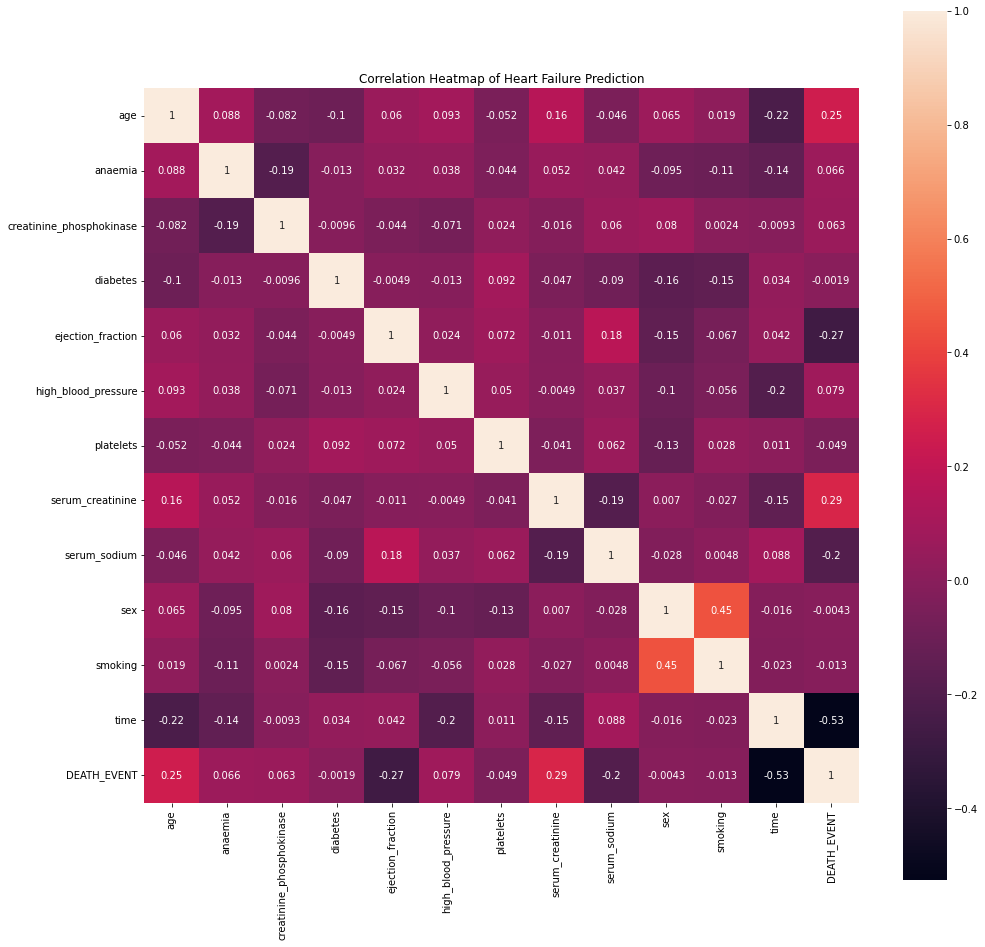

In [10]:
fig, ax = plt.subplots()
plt.title('Correlation Heatmap of Heart Failure Prediction')
fig.set_size_inches((16,16))

sns.heatmap(df.corr(),
            square = True,
            annot = True)

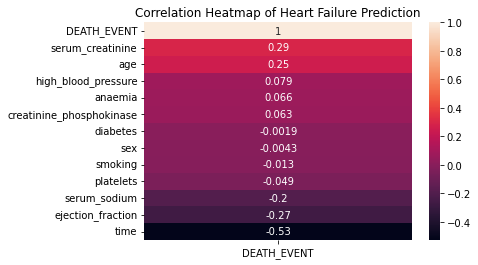

In [11]:
sns.heatmap(df.corr()[['DEATH_EVENT']].sort_values(by='DEATH_EVENT', ascending=False),
                                                   annot = True)

plt.title('Correlation Heatmap of Heart Failure Prediction')
plt.show()

Dapat terlihat pada tabel di atas, bahwa nilai korelasi masing-masing variabel terhadap variabel DEATH_EVENT menunjukkan angka yang cukup kecil. Variabel yang memiliki korelasi yang cukup tinggi terhadap variabel DEATH_EVENT adalah serum_creatinine dan variabel yang memiliki korelasi sangat rendah terhadap variabel DEATH_EVENT adalah variabel time

## NUMERICAL FEATURES

In [12]:
num_val

['age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time']

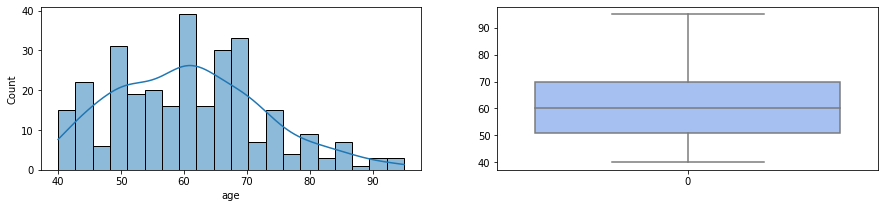

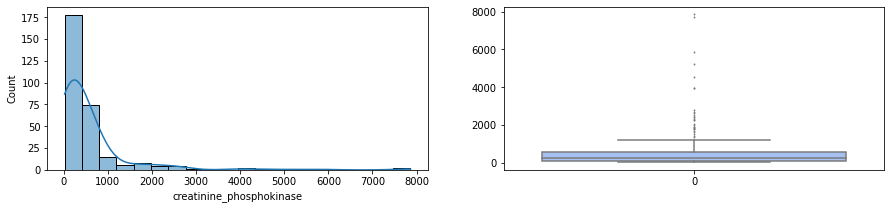

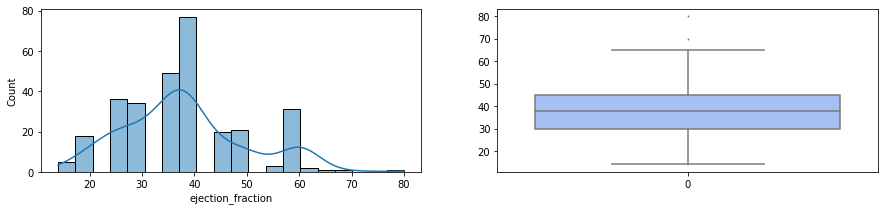

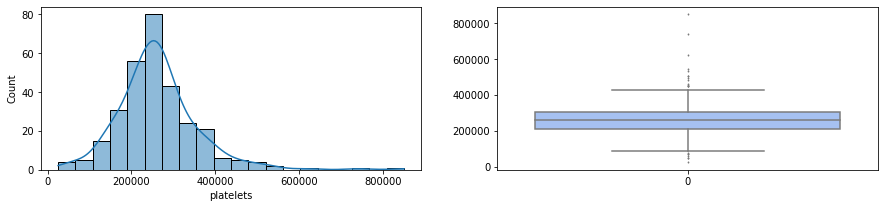

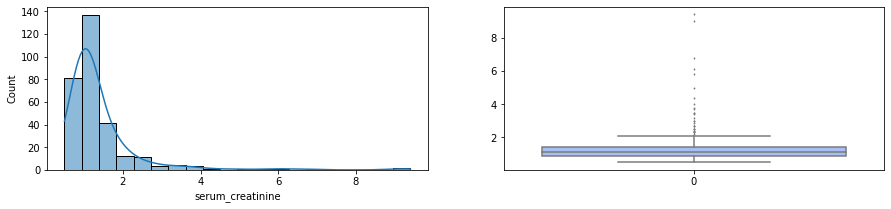

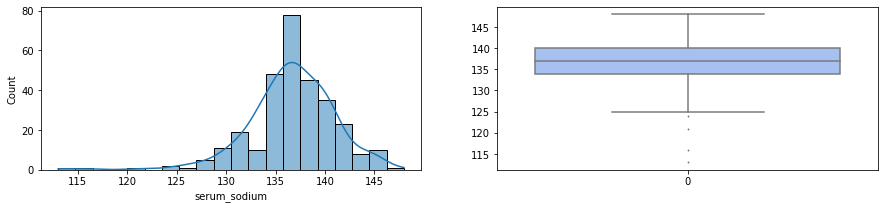

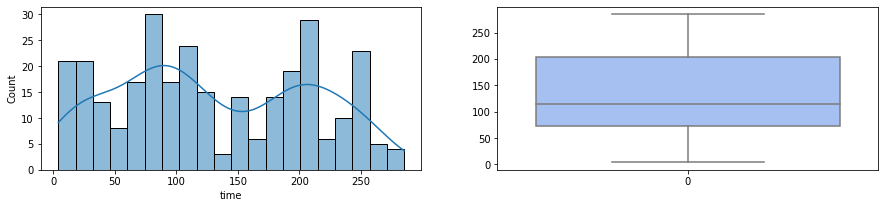

In [13]:
num_col = ["age","creatinine_phosphokinase","ejection_fraction",
           "platelets","serum_creatinine","serum_sodium", "time"]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(df[i],
                 bins=20,
                 kde=True,
                 ax=axs[0]);
    
    sns.boxplot(df[i],
                ax = axs[1],
                color='#99befd',
                fliersize=1);

Berdasarkan visualisasi di atas dapat diketahui bahwa hampir semua variabel memiliki outliers. Untuk itu kami akan melakukan penanganan pada fitur-fitur yang memiliki outliers

## BOOLEAN FEATURES

Boolean merupakan tipe data yang hanya memiliki dua nilai. Dalam kasus ini, beberapa fitur hanya memiliki dua nilai yaitu 0 (tidak) dan 1 (ya).

Fitur-fitur tersebut diantaranya adalah anaemia, diabetes, high_blood_preassure, sex, smooking, dan DEATH_EVENT

In [14]:
cate_val

['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']

### Analisis Kolom anaemia

In [15]:
df['anaemia'].unique()

array([0, 1], dtype=int64)

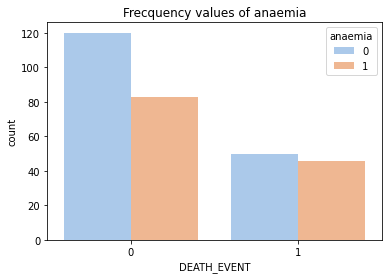

In [16]:
sns.countplot(x ='DEATH_EVENT',
              hue = "anaemia",
              data = df,
              palette = "pastel")
plt.title('Frecquency values of anaemia')
plt.show()

In [17]:
df['anaemia'].value_counts()

0    170
1    129
Name: anaemia, dtype: int64

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mengalami pengurangan hemoglobin (anemia) atau tidak, cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal.

Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mengalami penurunan hemoglobin (anemia)

### Analisis Kolom diabetes

In [18]:
df['diabetes'].unique()

array([0, 1], dtype=int64)

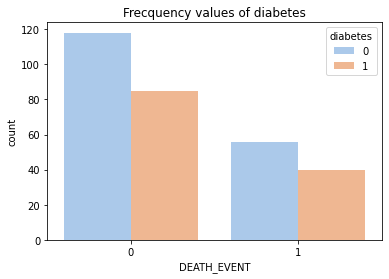

In [19]:
sns.countplot(x ='DEATH_EVENT',
              hue = "diabetes",
              data = df,
              palette = "pastel")

plt.title('Frecquency values of diabetes')
plt.show()

In [20]:
df['diabetes'].value_counts()

0    174
1    125
Name: diabetes, dtype: int64

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mengidap diabetes dan tidak, cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal.

Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mengidap diabetes, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mengidap diabetes.

### Analisis Kolom high_blood_pressure

In [21]:
df['high_blood_pressure'].unique()

array([1, 0], dtype=int64)

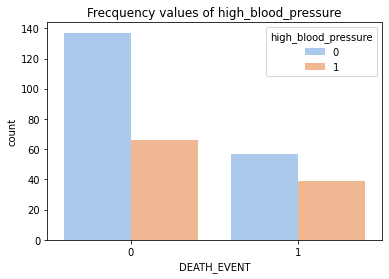

In [22]:
sns.countplot(x ='DEATH_EVENT',
              hue = "high_blood_pressure",
              data = df,
              palette = "pastel")

plt.title('Frecquency values of high_blood_pressure')
plt.show()

In [23]:
df['high_blood_pressure'].value_counts()

0    194
1    105
Name: high_blood_pressure, dtype: int64

Pada visualisasi di atas, secara keseluruhan diketahui bahwa perbandingan antara seseorang baik yang mempunyai darah tinggi atau tidak, cenderung lebih banyak yang tidak meninggal dibandingkan dengan yang meninggal.

Sedangkan untuk frekuensi seseorang yang meninggal lebih banyak yang tidak mempunyai darah tinggi, begitupun untuk frekuensi seseorang yang tidak meninggal lebih banyak yang tidak mempunyai darah tinggi.

### Analisis Kolom sex

In [24]:
df['sex'].unique()

array([1, 0], dtype=int64)

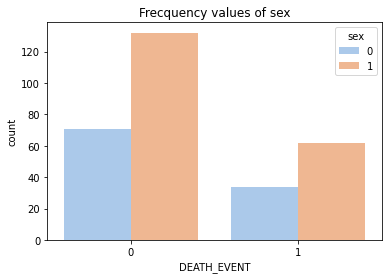

In [25]:
sns.countplot(x ='DEATH_EVENT',
              hue = "sex",
              data = df,
              palette = "pastel")

plt.title('Frecquency values of sex')
plt.show()

In [26]:
df['sex'].value_counts()

1    194
0    105
Name: sex, dtype: int64

Pada visualisasi di atas, secara keseluruhan diketahui bahwa frekuensi seseorang yang meninggal lebih banyak berjenis kelamin wanita dibandingkan pria, begitupun dengan frekuensi seseorang yang tidak meninggal lebih banyak yang berjenis kelamin wanita.

### Analisis Kolom DEATH_EVENT

In [27]:
df['DEATH_EVENT'].unique()

array([1, 0], dtype=int64)

In [28]:
num_obs = len(df)
num_true = len(df.loc[df['DEATH_EVENT'] == 1])
num_false = len(df.loc[df['DEATH_EVENT'] == 0])
print('Jumlah Pasien Meninggal : {1} ({1:2.2f}%)'.format(num_true, (num_true/num_obs) * 100))
print('Jumlah Tidak Pasien Meninggal : {0} ({1:2.2f}%)'.format(num_false, (num_false/num_obs) * 100))

Jumlah Pasien Meninggal : 32.10702341137124 (32.11%)
Jumlah Tidak Pasien Meninggal : 203 (67.89%)


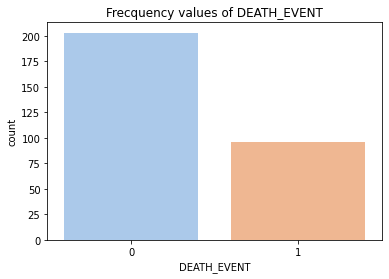

In [29]:
sns.countplot(x = 'DEATH_EVENT',
              data = df,
              palette = 'pastel')
plt.title('Frecquency values of DEATH_EVENT')
plt.show()

Pada visualisasi di atas, dapat terlihat bahwa kolom DEATH_EVENT menunjukkan data yang imbalanced. Imbalanced merupakan suatu keadaan dimana distribusi kelas data tidak seimbang, jumlah kelas data (instance) yang satu lebih sedikit atau lebih banyak dibanding dengan jumlah kelas data lainnya. Selanjutnya akan kami lakukan penanganan agar data menjadi seimbang.

# **DATA PREPROCESSING**
---

Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data menjadi train-dev-test, transformasi data
(normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

In [30]:
# for preprocessing
data = df.copy()

## Handling Outlier

In [31]:
features_with_outliers = ["creatinine_phosphokinase","ejection_fraction",
                          "platelets","serum_creatinine","serum_sodium"]

for feature in features_with_outliers:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    IQR = q3-q1
    
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    
    data.loc[data[feature]<lower_limit,feature] = lower_limit
    data.loc[data[feature]>upper_limit,feature] = upper_limit

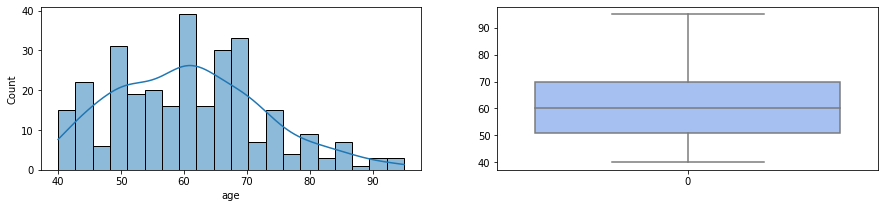

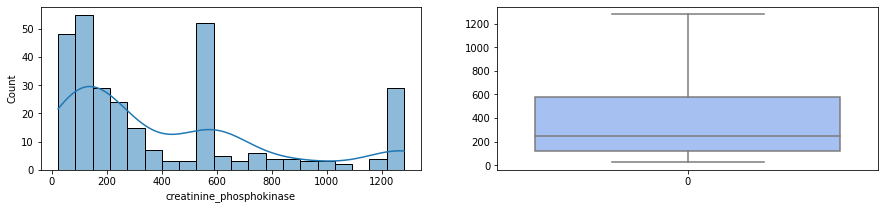

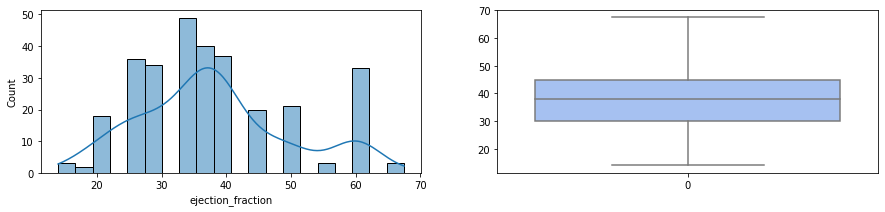

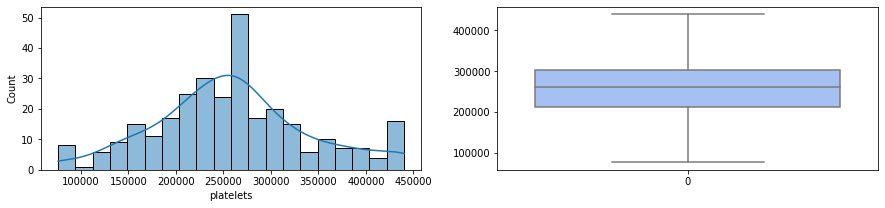

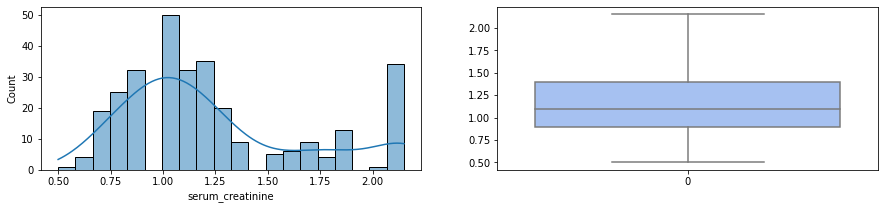

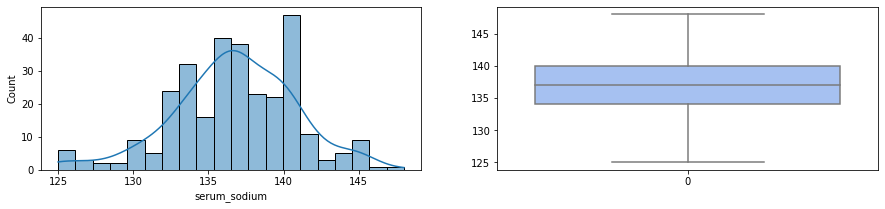

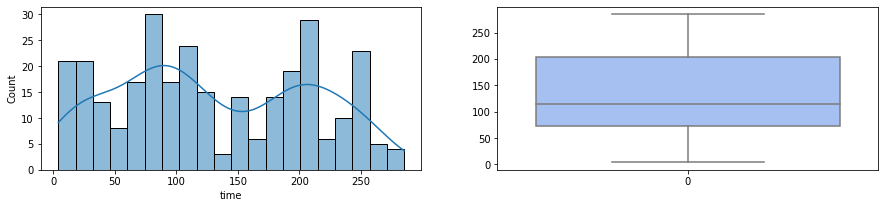

In [32]:
num_col = ["age","creatinine_phosphokinase","ejection_fraction",
           "platelets","serum_creatinine","serum_sodium", "time"]

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(15, 3))

    sns.histplot(data[i],bins=20, kde=True,ax=axs[0]);
    sns.boxplot(data[i], ax = axs[1], color='#99befd', fliersize=1);

Pada visualisasi di atas bahwa sudah tidak ada outliers dan data memiliki persebaran yang baik

## Splitting Dataset

In [33]:
datas = data.copy()

In [34]:
datas.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [35]:
# spliting training and testing data
from sklearn.model_selection import train_test_split
feature_col_names = data.drop(['DEATH_EVENT'],axis=1)
predicted_class_name = data['DEATH_EVENT']
#feature_col_names = datas[['age', 'anaemia', 'high_blood_pressure','serum_creatinine']]
#predicted_class_name = datas['DEATH_EVENT']

X = feature_col_names
y = predicted_class_name

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.30,
                                                    random_state=40)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [37]:
predicted_class_name

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

In [38]:
print('{0:0.2f}% ada pada training set'.format((len(X_train)/len(data.index)) * 100))
print('{0:0.2f}% ada pada training set'.format((len(X_test)/len(data.index)) * 100))

69.90% ada pada training set
30.10% ada pada training set


In [39]:
print('Jumlah Pasien Meninggal : {1} ({1:2.2f}%)'.format(len(data.loc[data['DEATH_EVENT'] == 1]), (len(data.loc[data['DEATH_EVENT'] == 1])/len(data.index))))
print('Jumlah Tidak Pasien Meninggal : {0} ({1:2.2f}%)'.format(len(data.loc[data['DEATH_EVENT'] == 0]), (len(data.loc[data['DEATH_EVENT'] == 0])/len(data.index))))
print(" ")
print('Training True : {1} ({1:2.2f}%)'.format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/ len(y_train) * 100)))
print('Training False : {0} ({1:2.2f}%)'.format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/ len(y_train) * 100)))
print(" ")
print('Testing True : {1} ({1:2.2f}%)'.format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/ len(y_test) * 100)))
print('Testing False : {0} ({1:2.2f}%)'.format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/ len(y_test) * 100)))

Jumlah Pasien Meninggal : 0.3210702341137124 (0.32%)
Jumlah Tidak Pasien Meninggal : 203 (0.68%)
 
Training True : 31.100478468899524 (31.10%)
Training False : 144 (68.90%)
 
Testing True : 34.44444444444444 (34.44%)
Testing False : 59 (65.56%)


In [40]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.00,1,38.0,1,155000.00,1.10,143,1,1,270,0
295,55.0,0,1280.25,0,38.0,0,270000.00,1.20,139,0,0,271,0
296,45.0,0,1280.25,1,60.0,0,440000.00,0.80,138,0,0,278,0
297,45.0,0,1280.25,0,38.0,0,140000.00,1.40,140,1,1,280,0


In [41]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [42]:
print('# row in dataframe {0}'.format(len(data)))
print('# row missing age {0}'.format(len(data.loc[data['age'] == 0])))
#print('# row missing anaemia {0}'.format(len(data.loc[data['anaemia'] == 0])))
#print('# row missing creatinine_phosphokinase {0}'.format(len(data.loc[data['creatinine_phosphokinase'] == 0])))
#print('# row missing high_blood_pressure {0}'.format(len(data.loc[data['high_blood_pressure'] == 0])))
print('# row missing serum_creatinine {0}'.format(len(data.loc[data['serum_creatinine'] == 0])))

# row in dataframe 299
# row missing age 0
# row missing serum_creatinine 0


## Handling Imbalanced Data

Teknik Penyeimbang dataset yang digunakan adalah :
- SMOTE
- Borderline SMOTE
- ADASYN

Parameter k_neighbors diatur menjadi 8 neighbors untuk setiap teknik

### SMOTE

In [43]:
smote = SMOTE(k_neighbors=8)

In [44]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),
                                                  y_train)

In [45]:
from collections import Counter
print('Before SMOTE : ', Counter(y_train))
print('After SMOTE :', Counter(y_train_smote))

Before SMOTE :  Counter({0: 144, 1: 65})
After SMOTE : Counter({0: 144, 1: 144})


### Borderline SMOTE

In [46]:
b_smote = BorderlineSMOTE(k_neighbors=8)

In [47]:
X_train_bsmote, y_train_bsmote = b_smote.fit_resample(X_train.astype('float'),
                                                      y_train)

In [48]:
from collections import Counter
print('Before BSMOTE : ', Counter(y_train))
print('After BSMOTE :', Counter(y_train_bsmote))

Before BSMOTE :  Counter({0: 144, 1: 65})
After BSMOTE : Counter({0: 144, 1: 144})


### ADASYN

In [49]:
ada = ADASYN(n_neighbors=8)

In [50]:
X_train_ada, y_train_ada = ada.fit_resample(X_train.astype('float'),
                                            y_train)

In [51]:
from collections import Counter
print('Before ADASYN : ', Counter(y_train))
print('After ADASYN :', Counter(y_train_bsmote))

Before ADASYN :  Counter({0: 144, 1: 65})
After ADASYN : Counter({0: 144, 1: 144})


# **MODELLING**
---

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## Random Forest

Model machine learning yang akan kita bandingkan pertama yaitu Random Forest.

In [53]:
from sklearn.ensemble import RandomForestClassifier
#Latih model dengan RandomForestClassifier()
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
print(forest)

RandomForestClassifier()


### Performa Model pada Data Train

Setelah model dibuat, maka lakukan perhitungan untuk memperoleh classification report dan confusion matrix dari data train dengan source code dan hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [54]:
#Menampilkan hasil training dengan confusion matrix
from sklearn.metrics import classification_report
# Predict
y_predforest = forest.predict(X_train)
# Print classification report 
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_predforest))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00        65

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



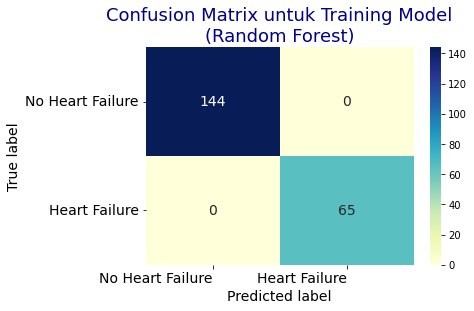

In [55]:
#Menampilkan hasil training model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_predforest)), ('No Heart Failure', 'Heart Failure'), ('No Heart Failure', 'Heart Failure'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data training dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi sangat kuat 96% dengan detail :
- prediksi gagal jantung yang sebenarnya gagal jantung = 56
- prediksi tidak gagal jantung yang sebenarnya tidak gagal jantung = 144
- prediksi tidak gagal jantung yang sebenarnya gagal jantung = 9
- prediksi gagal jantung yang sebenarnya tidak gagal jantung = 0

### Performa Model pada Data Test

Lakukan perhitungan untuk memperoleh classification report dan confusion matrix juga pada data test dengan source code dan hasil di bawah ini. Gunakan classification_report() & confusion_matrix().

In [56]:
#Menampilkan hasil testing model dengan confusion matrix
# Predict
y_predforest = forest.predict(X_test)
# Print classification report
print('Classification Report Testing Model (Random Forest):')
print(classification_report(y_test, y_predforest))

Classification Report Testing Model (Random Forest):
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        59
           1       0.81      0.84      0.83        31

    accuracy                           0.88        90
   macro avg       0.86      0.87      0.87        90
weighted avg       0.88      0.88      0.88        90



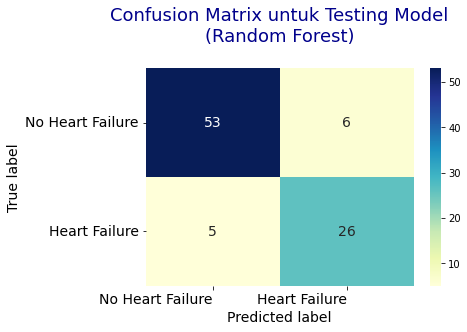

In [57]:
#Menampilkan hasil testing model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_predforest)), ('No Heart Failure', 'Heart Failure'), ('No Heart Failure', 'Heart Failure'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data training dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi sangat kuat 87% dengan detail :
- prediksi gagal jantung yang sebenarnya gagal jantung = 25
- prediksi tidak gagal jantung yang sebenarnya tidak gagal jantung = 53
- prediksi tidak gagal jantung yang sebenarnya gagal jantung = 6
- prediksi gagal jantung yang sebenarnya tidak gagal jantung = 6

## XGBoost

Dengan XGBoost, model yang dibangun dapat mengoptimalkan sumber daya komputasi berdasarkan algoritma tree. XGBoost digunakan pada kasus ini juga karena:
- Execution Speed (Memory Efficient)
- Model Performance ( High Accuracy )

Selanjutnya, untuk menggunakan algoritma GradientBoosting, kita dapat import dari module sklearn.ensemble. Cukup gunakan function GradientBoostingClassifier() untuk melakukan training data.

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
#Latih model dengan GradientBoostingClassifier()
gbt_model = GradientBoostingClassifier().fit(X_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


### Performa Model pada Data Train

In [59]:
#Menampilkan hasil training dengan confusion matrix
from sklearn.metrics import classification_report
# Predict
y_GB = gbt_model.predict(X_train)
# Print classification report 
print('Classification Report Training Model (Gradien Boosting) :')
print(classification_report(y_train, y_GB))

Classification Report Training Model (Gradien Boosting) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       144
           1       1.00      1.00      1.00        65

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



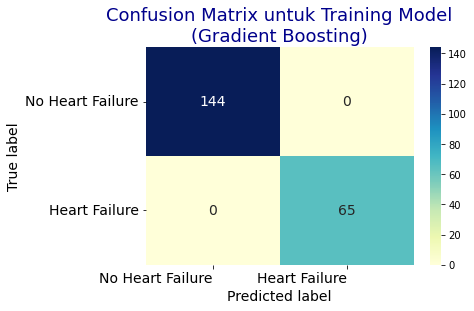

In [60]:
#Menampilkan hasil training model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_GB)), ('No Heart Failure', 'Heart Failure'), ('No Heart Failure', 'Heart Failure'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data training dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi sempurna 100% dengan detail :
- prediksi gagal jantung yang sebenarnya gagal jantung = 65
- prediksi tidak gagal jantung yang sebenarnya tidak gagal jantung = 144
- prediksi tidak gagal jantung yang sebenarnya gagal jantung = 0
- prediksi gagal jantung yang sebenarnya tidak gagal jantung = 0

### Performa Model pada Data Test

In [61]:
#Menampilkan hasil testing model dengan confusion matrix
# Predict
y_GB = gbt_model.predict(X_test) 
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test, y_GB))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        59
           1       0.78      0.90      0.84        31

    accuracy                           0.88        90
   macro avg       0.86      0.88      0.87        90
weighted avg       0.89      0.88      0.88        90



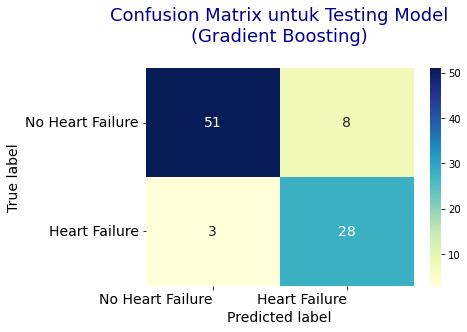

In [62]:
#Menampilkan hasil testing model dengan visualisasi heatmap dari confusion matrix 
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_GB)), ('No Heart Failure', 'Heart Failure'), ('No Heart Failure', 'Heart Failure'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix untuk Testing Model\n(Gradient Boosting)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Dari data testing dapat dilihat bahwa model mampu memprediksi data dengan tingkat akurasi sangat kuat 88% dengan detail :
- prediksi gagal jantung yang sebenarnya gagal jantung = 28
- prediksi tidak gagal jantung yang sebenarnya tidak gagal jantung = 51
- prediksi tidak gagal jantung yang sebenarnya gagal jantung = 3
- prediksi gagal jantung yang sebenarnya tidak gagal jantung = 8

## Penentuan Algoritma Terbaik

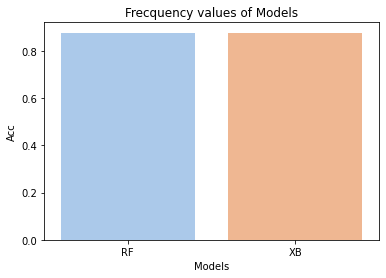

,Models,Acc
0,RF,0.877778
1,XB,0.877778


In [63]:
# best model is ...
final_data = pd.DataFrame({'Models' : [
                                       'RF',
                                       'XB',],
                                       'Acc':[
                                            accuracy_score(y_test, y_predforest),
                                            accuracy_score(y_test, y_GB)]})
final_data = final_data.sort_values('Acc')
sns.barplot(data = final_data,
            x = 'Models',
            y = 'Acc',
            palette = 'pastel')

plt.title('Frecquency values of Models')
plt.show()

final_data

Model yang terbaik dari kedua model di atas adalah model dengan metode random forest (random_forest_model) dengan tingkat akurasi 86%

## Modeling Random Forest

Algoritma yang digunakan adalah Random Forest, terdapat 4 model yang akan dilatih dengan teknik penyeimbang datasetnya masing-masing. 

Berikut Modelnya : 
- model_unbalanced : Model yang menggunakan data yang belum seimbang
- model_smote : Model yang menggunakan teknik smote sebagai penyeimbang jumlah data kelas dataset
- mode_bsmote : Model yang menggunakan teknik borderline smote sebagai penyeimbang jumlah data kelas dataset
- mode_ada : Model yang menggunakan teknik adasyn sebagai penyeimbang jumlah data kelas dataset

In [64]:
model_unbalanced = RandomForestClassifier()       

model_smote = RandomForestClassifier()  

model_bsmote = RandomForestClassifier()   

model_ada = RandomForestClassifier()

In [65]:
model_unbalanced.fit(X_train, y_train)

model_smote.fit(X_train_smote, y_train_smote)

model_bsmote.fit(X_train_bsmote, y_train_bsmote)

model_ada.fit(X_train_ada, y_train_ada)

RandomForestClassifier()

In [66]:
y_unbalanced_pred = model_unbalanced.predict(X_test)

y_smote_pred = model_smote.predict(X_test)

y_bsmote_pred = model_bsmote.predict(X_test)

y_ada_pred = model_ada.predict(X_test)

## Evaluation

Pada Bagian Evaluation tiap classification report dan confusion matrix dari tiap model akan ditampilkan

### Unbalanced Data

In [67]:
from sklearn.metrics import classification_report,accuracy_score

 # set y_test to the expected output
print(classification_report(y_test, y_unbalanced_pred))
print("Accuracy of the Model:",accuracy_score(y_test, y_unbalanced_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.91      0.86      0.89        59
           1       0.76      0.84      0.80        31

    accuracy                           0.86        90
   macro avg       0.84      0.85      0.84        90
weighted avg       0.86      0.86      0.86        90

Accuracy of the Model: 85.55555555555556 %


<AxesSubplot: >

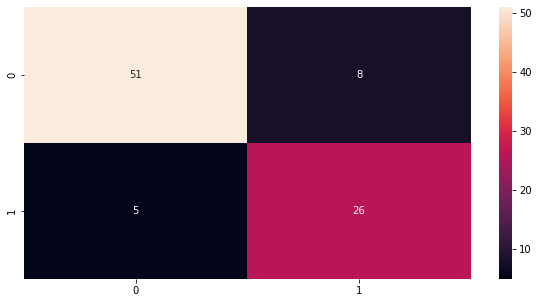

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm1 = confusion_matrix(y_test, y_unbalanced_pred)
sns.heatmap(cm1, annot=True, fmt = 'g')

Pada visualisasi Confusion Matrix untuk model unbalanced data menunjukan bahwa terdapat 35 + 16 = 51 diprediksi benar (sesuai) dan 2 + 7 = 9 diprediksi tidak benar (tidak sesuai).

Pada model unbalnaced data, dapat kita lihat bahwa terdapat
*   True Positives (Actual Positive:1s and Predict Positive:1s) = 16
*   True Negatives (Actual Negative:0s and Predict Negative:0s) = 35
*   False Positives (Actual Negative:0s but Predict Positive:1s) = 7(Kesalahan tipe I)
*   False Negatives (Actual Positive:1 but Predict Negative:0) = 2(Kesalahan tipe II)

### SMOTE

In [69]:
from sklearn.metrics import classification_report,accuracy_score

 # set y_test to the expected output
print(classification_report(y_test, y_smote_pred))
print("Accuracy of the Model:",accuracy_score(y_test, y_smote_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        59
           1       0.76      0.81      0.78        31

    accuracy                           0.84        90
   macro avg       0.83      0.84      0.83        90
weighted avg       0.85      0.84      0.85        90

Accuracy of the Model: 84.44444444444444 %


<AxesSubplot: >

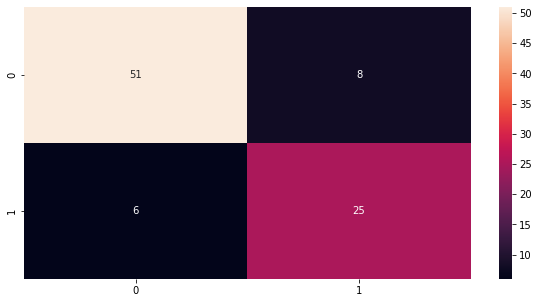

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm2 = confusion_matrix(y_test, y_smote_pred)
sns.heatmap(cm2, annot=True, fmt = 'g')

Pada visualisasi Confusion Matrix untuk model unbalanced data menunjukan bahwa terdapat 35 + 16 = 51 diprediksi benar (sesuai) dan 2 + 7 = 9 diprediksi tidak benar (tidak sesuai).

Pada model SMOTE, dapat kita lihat bahwa terdapat
*   True Positives (Actual Positive:1s and Predict Positive:1s) = 16
*   True Negatives (Actual Negative:0s and Predict Negative:0s) = 35
*   False Positives (Actual Negative:0s but Predict Positive:1s) = 7 (Kesalahan tipe I)
*   False Negatives (Actual Positive:1 but Predict Negative:0) = 2 (Kesalahan tipe II)

### Borderline SMOTE

In [71]:
from sklearn.metrics import classification_report,accuracy_score

 # set y_test to the expected output
print(classification_report(y_test, y_bsmote_pred))
print("Accuracy of the Model:",accuracy_score(y_test, y_bsmote_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.91      0.85      0.88        59
           1       0.74      0.84      0.79        31

    accuracy                           0.84        90
   macro avg       0.83      0.84      0.83        90
weighted avg       0.85      0.84      0.85        90

Accuracy of the Model: 84.44444444444444 %


<AxesSubplot: >

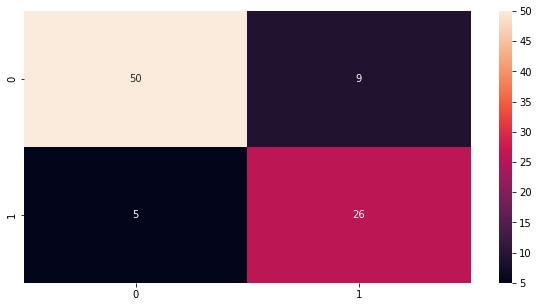

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm3 = confusion_matrix(y_test, y_bsmote_pred)
sns.heatmap(cm3, annot=True, fmt = 'g')

Pada visualisasi Confusion Matrix untuk model unbalanced data menunjukan bahwa terdapat 34 + 16 = 50 diprediksi benar (sesuai) dan 3 + 7 = 10 diprediksi tidak benar (tidak sesuai).

Pada model Borderline SMOTE, dapat kita lihat bahwa terdapat
*   True Positives (Actual Positive:1s and Predict Positive:1s) = 16
*   True Negatives (Actual Negative:0s and Predict Negative:0s) = 34
*   False Positives (Actual Negative:0s but Predict Positive:1s) = 7(Kesalahan tipe I)
*   False Negatives (Actual Positive:1 but Predict Negative:0) = 3(Kesalahan tipe II)

### ADASYN

In [73]:
from sklearn.metrics import classification_report,accuracy_score

 # set y_test to the expected output
print(classification_report(y_test, y_ada_pred))
print("Accuracy of the Model:",accuracy_score(y_test, y_ada_pred)*100,"%")

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        59
           1       0.72      0.84      0.78        31

    accuracy                           0.83        90
   macro avg       0.81      0.83      0.82        90
weighted avg       0.84      0.83      0.84        90

Accuracy of the Model: 83.33333333333334 %


<AxesSubplot: >

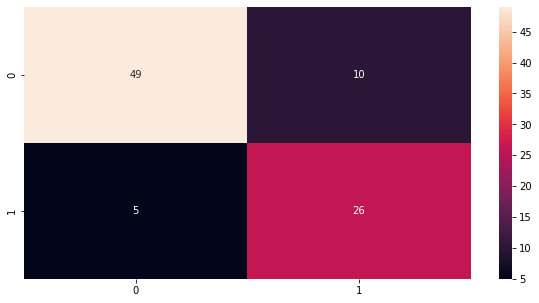

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm4 = confusion_matrix(y_test, y_ada_pred)
sns.heatmap(cm4, annot=True, fmt = 'g')

Pada visualisasi Confusion Matrix untuk model unbalanced data menunjukan bahwa terdapat 35 + 18 = 53 diprediksi benar (sesuai) dan 2 + 5 = 7 diprediksi tidak benar (tidak sesuai).

Pada model ADASYN, dapat kita lihat bahwa terdapat
*   True Positives (Actual Positive:1s and Predict Positive:1s) = 18
*   True Negatives (Actual Negative:0s and Predict Negative:0s) = 35
*   False Positives (Actual Negative:0s but Predict Positive:1s) = 5(Kesalahan tipe I)
*   False Negatives (Actual Positive:1 but Predict Negative:0) = 2(Kesalahan tipe II)

## Comparison

Pada bagian ini akan ditampilkan perbandingan nilai evaluasi (Akurasi, Recall, Precision) pada setiap model

In [75]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

hasil1 = [(accuracy_score(y_test, y_unbalanced_pred) * 100), (recall_score(y_test, y_unbalanced_pred,  pos_label=1) * 100), (precision_score(y_test, y_unbalanced_pred,  pos_label=1) * 100), (f1_score(y_test, y_unbalanced_pred,  pos_label=1) * 100)]
hasil2 = [(accuracy_score(y_test, y_smote_pred) * 100), (recall_score(y_test, y_smote_pred,  pos_label=1) * 100), (precision_score(y_test, y_smote_pred,  pos_label=1) * 100), (f1_score(y_test, y_smote_pred,  pos_label=1) * 100)]
hasil3 = [(accuracy_score(y_test, y_bsmote_pred) * 100), (recall_score(y_test, y_bsmote_pred,  pos_label=1) * 100), (precision_score(y_test, y_bsmote_pred,  pos_label=1) * 100), (f1_score(y_test, y_bsmote_pred,  pos_label=1) * 100)]
hasil4 = [(accuracy_score(y_test, y_ada_pred) * 100), (recall_score(y_test, y_ada_pred,  pos_label=1) * 100), (precision_score(y_test, y_ada_pred,  pos_label=1) * 100), (f1_score(y_test, y_ada_pred,  pos_label=1) * 100)]

dic = {'Unbalanced' : [str(round((hasil1[0]))) + '%', str(round((hasil1[1]))) + '%', str(round((hasil1[2]))) + '%', str(round((hasil1[3]))) + '%'], 
       'SMOTE' : [str(round((hasil2[0]))) + '%', str(round((hasil2[1]))) + '%', str(round((hasil2[2]))) + '%', str(round((hasil2[3]))) + '%'],
       'Borderline_SMOTE' : [str(round((hasil3[0]))) + '%', str(round((hasil3[1]))) + '%', str(round((hasil3[2]))) + '%', str(round((hasil3[3]))) + '%'],
       'ADASYN' : [str(round((hasil4[0]))) + '%', str(round((hasil4[1]))) + '%', str(round((hasil4[2]))) + '%', str(round((hasil4[3]))) + '%']}

df_hasil = pd.DataFrame(data = dic, index=['Accuracy', 'Recall', 'Precision', 'F1-Score'])
df_hasil

,Unbalanced,SMOTE,Borderline_SMOTE,ADASYN
Accuracy,86%,84%,84%,83%
Recall,84%,81%,84%,84%
Precision,76%,76%,74%,72%
F1-Score,80%,78%,79%,78%


## Simpan Model dengan Pickle

Setelah menentukan model algoritma, kemudian kita dapat simpan model tersebut sebagai file model_bsmote.pkl dengan tujuan untuk deployment model

In [76]:
# save model using pickle
import pickle
pickle.dump(model_bsmote, open('model_bsmote.pkl', 'wb'))

In [77]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# **CONCLUSION**
---

Berdasarkan pemodelan yang telah dilakukan dengan menggunakan Random Forest dan Extreme Gradiant Boost, maka dapat disimpulkan untuk memprediksi pasien yang meninggal karena gagal jantung dengan menggunakan dataset ini model terbaiknya adalah menggunakan algoritma Random Forest. Hal ini dikarenakan performa dari model Random Forest (Borderline_SMOTE) cenderung mampu memprediksi dengan akurasi 87%

Setiap Nilai evaluasi pada bagian perbandingan model memiliki nilai yang hampir sama.

- Untuk nilai akurasi berada di rentang nilai 81 - 87
- Untuk nilai recall berada di rentang nilai 81 - 87
- Untuk nilai Precision berada di rentang nilai 69 - 78
- Untuk nilai F1-Score berada di rentang 75 - 82

**Note: Untuk nilai Accuracy, Recall, Precision, F1-Score akan terus berubah jika dilakukan run ulang**

Nilai evaluasi terutama untuk nilai akurasi tidak bisa mencapai nilai 95 persen yang merupakan nilai optimal untuk model klasifikasi, hal ini dikarenakan beberapa faktor : 
1. Kolerasi setiap kolom terhadap variabel dependen(Death Event) terlalu kecil, kolom atau variabel independen dengan nilai korelasi tertinggi dengan variabel dependen hanya berada direntang nilai 0.2
2. Jumlah Dataset yang terlalu sedikit, yaitu hanya berjumlah 300 data, dan data tersebut nantinya akan dibagi ke dalam data training data testing

# **MODEL INFERENCE**
---

Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang kita gunakan adalah data buatan sendiri.

In [78]:
X.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

        'age' : 55,
        'anaemia' : 0,
        'creatinine_phosphokinase' : 111,
        'diabetes' : 1,
        'ejection_fraction' : 20,
        'high_blood_pressure' : 1,
        'platelets' : 127000,
        'serum_creatinine' : 1.10,
        'serum_sodium' : 130,
        'sex' : 1,
        'smoking' : 1,
        'time' : 4,

In [79]:
def user_input_features():
    new_data = pd.DataFrame({
        'age' : 20,
        'anaemia' : 0,
        'creatinine_phosphokinase' : 0,
        'diabetes' : 0,
        'ejection_fraction' : 0,
        'high_blood_pressure' : 1,
        'platelets' : 0,
        'serum_creatinine' : 1.30,
        'serum_sodium' : 0,
        'sex' : 0,
        'smoking' : 0,
        'time' : 0,
    }, index=[0])
    features = pd.DataFrame(new_data, index=[0])
    return features

In [80]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582.00,0,20.0,1,265000.00,1.90,130,1,0,4,1
1,55.0,0,1280.25,0,38.0,0,263358.03,1.10,136,1,0,6,1
2,65.0,0,146.00,0,20.0,0,162000.00,1.30,129,1,1,7,1
3,50.0,1,111.00,0,20.0,0,210000.00,1.90,137,1,0,7,1
4,65.0,1,160.00,1,20.0,0,327000.00,2.15,125,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61.00,1,38.0,1,155000.00,1.10,143,1,1,270,0
295,55.0,0,1280.25,0,38.0,0,270000.00,1.20,139,0,0,271,0
296,45.0,0,1280.25,1,60.0,0,440000.00,0.80,138,0,0,278,0
297,45.0,0,1280.25,0,38.0,0,140000.00,1.40,140,1,1,280,0


In [81]:
input_df = user_input_features()
input_df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,20,0,0,0,0,1,0,1.3,0,0,0,0


In [82]:
# Combines user input features with entire dataset
# This will be useful for the encoding phase
heart_failure_clinical_records_dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_failure_clinical_records_dataset = heart_failure_clinical_records_dataset.drop(columns=['DEATH_EVENT'])

df = pd.concat([input_df,heart_failure_clinical_records_dataset],axis=0)
df = df[:1]

In [83]:
# Reads in saved classification model
load_clf = pickle.load(open('model_bsmote.pkl', 'rb'))

# Apply model to make predictions
prediction = load_clf.predict(df)
print('Prediction :')
print(prediction)
if prediction[0]==0:
    print("Pasien tidak menderita penyakit jantung")
else:
    print("Pasien menderita penyakit jantung")

print('')
prediction_proba = load_clf.predict_proba(df)
print('Prediction Probability :')
print(prediction_proba)

Prediction :
[1]
Pasien menderita penyakit jantung

Prediction Probability :
[[0.27 0.73]]
